### Step.1  Import libraries 

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



### Step. 2 Import Data 

In [80]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Step.3 Descriptive Statistics

In [81]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [83]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [84]:
df = df.dropna()


In [85]:
df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)

df['pH'].fillna(df['pH'].mean(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9264\1796337818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9264\1796337818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [86]:
# Numerical columns → fill with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Categorical columns → fill with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_9264\1941959969.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [87]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Step.4 Data Visualization

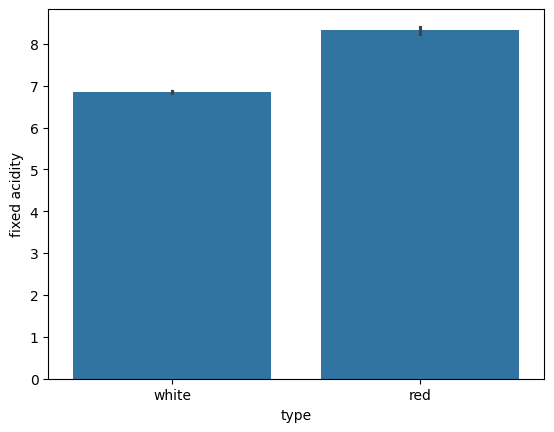

In [88]:
sns.barplot(x='type', y='fixed acidity', data=df)
plt.show()

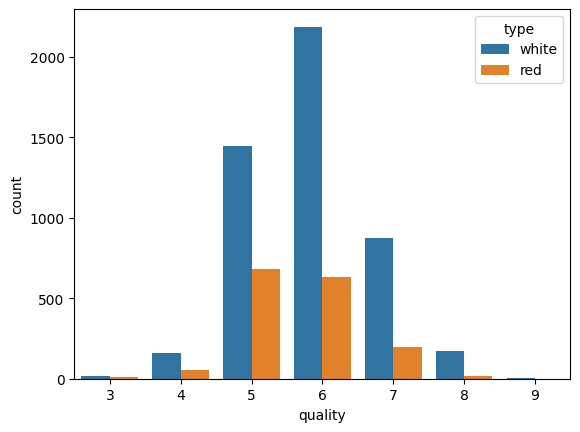

In [89]:
sns.countplot(x='quality', hue='type', data=df)
plt.show()  

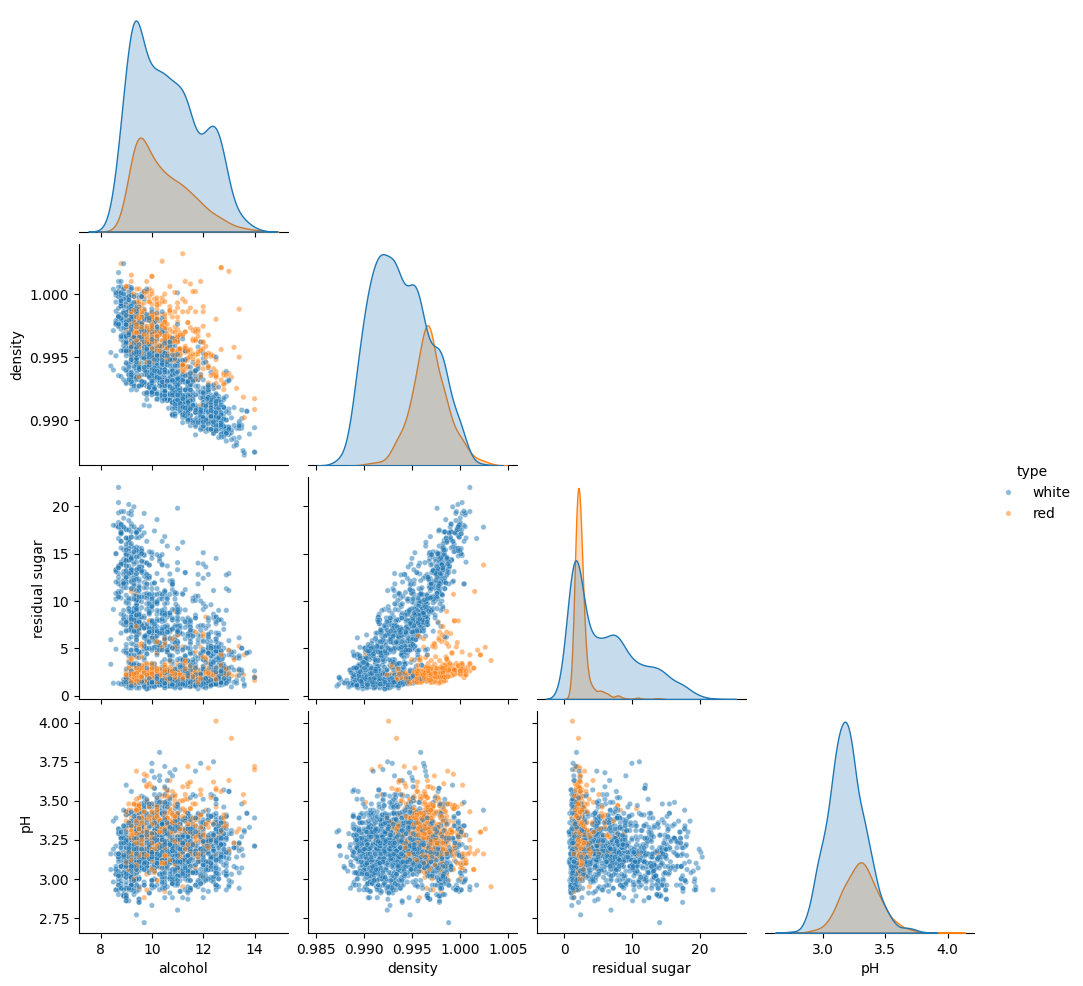

In [90]:
sample_df = df.sample(n=min(len(df), 2000), random_state=42)
features = ['alcohol', 'density', 'residual sugar', 'pH']
sns.pairplot(sample_df[features + [col]], hue=col, corner=True, plot_kws={'alpha': 0.5, 's': 15})
plt.show()

### Step.5 Preprocessing 

In [91]:
# Encode the type column to numeric 
codes, uniques = pd.factorize(df['type'])
df['type'] = codes

# view the mapping
type_mapping = {label: code for code, label in enumerate(uniques)}
print("type mapping (label -> code):", type_mapping)
df.head()


type mapping (label -> code): {'white': 0, 'red': 1}


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Step.6 Featue Selection 

In [92]:
X = df.drop(columns=['type'])
y = df['type']

### Step.7 Split data 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step.8 Models  

In [94]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

### Step.9 Train Models 

In [95]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
svm.fit(X_train, y_train)

SVC(random_state=42)

### Step.10 Predictions

In [98]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)  
y_pred_svm = svm.predict(X_test)

### Step.11 Evaluation

In [99]:
# Print accuracy for each model on the test set
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Decision Tree Accuracy: {acc_dt:.3f}")
print(f"Random Forest Accuracy: {acc_rf:.3f}")
print(f"SVM Accuracy: {acc_svm:.3f}")

Decision Tree Accuracy: 0.981
Random Forest Accuracy: 0.995
SVM Accuracy: 0.939


In [100]:
print("Decision Tree Classifier Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt)) 

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1462
           1       0.95      0.97      0.96       477

    accuracy                           0.98      1939
   macro avg       0.97      0.98      0.97      1939
weighted avg       0.98      0.98      0.98      1939

Confusion Matrix:
 [[1440   22]
 [  15  462]]


In [101]:
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1462
           1       1.00      0.98      0.99       477

    accuracy                           0.99      1939
   macro avg       1.00      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939

Confusion Matrix:
 [[1460    2]
 [   8  469]]


In [102]:
print("SVM Classifier Report:\n", classification_report(y_test, y_pred_svm))

SVM Classifier Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1462
           1       0.95      0.79      0.86       477

    accuracy                           0.94      1939
   macro avg       0.94      0.89      0.91      1939
weighted avg       0.94      0.94      0.94      1939



### Step.12 Conclusion

In this study, three supervised machine learning models (Decision Tree, Random Forest, and Support Vector Machine) were applied to the wine dataset to classify wine quality based on fixed acidity,	volatile acidity,	citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates,	alcohol, quality measurements. Among all models Random Forest achieved strong performance with high accuracy 0.995.

---